In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#from scipy.stats import linregress
import json
from pprint import pprint

all_agencies = "agencies/all_agencies.csv" #this csv provides all the agencies reporting crime in the subject 4 cities
agency_df = pd.read_csv(all_agencies)

fbi_url = "https://api.usa.gov/crime/fbi/sapi/"

from config import fbi_key


agencies = agency_df["ori"]
agg_assault = []
burglary = []
larceny = []
mvt = []
homicide = []
rape = []
robbery = []
arson = []
viol_crime = []
prop_crime = []
crime = []



In [2]:
#This cell gets the response for all the agencies per year

##################################################
#for agency in agencies:

#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
    #url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2019/2019?API_KEY={fbi_key}"
    #response = requests.get(url)
    #response_json = response.json()
    
    #crime.extend(response_json["results"])

    #if we want to do specific offenses, put offenses in as {offenses}
    #print(response_json['results'])
###############################################

In [3]:
#county agencies - Reference of the county agencies assessed
#Brazos (college station) ori - TX0210000
#College Station (city) ori - TX0210200
#Waco (city) ori - TX1551200
#McLennan (Waco) ori - TX1550000
#Dallas (Dallas) ori - TX0570000
#Dallas (city) ori - TXDPD0000
#San Antonio (Bexar) ori - TX0150000
#San Antonio (city) ori - TXSPD0000

In [4]:
#for agency in agencies:
    
#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
#    url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2018/2019?API_KEY={fbi_key}"
#    response = requests.get(url)
#    response_json = response.json()
    
#    crime.extend(response_json["results"])

#crime_all_df=pd.DataFrame(crime)
#crime_all_df


In [5]:
#crime_all_df.to_csv(r'C:/Users/oscar/Desktop/Repos/Project-1/crime_all_df.csv')

In [6]:
crime_all_df = "crime_all_df.csv" #this csv provides all the crimes in the 4 cities
crime_all_df = pd.read_csv(crime_all_df)
crime_all_df

,Unnamed: 0,ori,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,2018,robbery,TX,0,0
1,1,TX0153500,2018,aggravated-assault,TX,31,31
2,2,TX0153500,2018,arson,TX,0,0
3,3,TX0153500,2018,burglary,TX,2,2
4,4,TX0153500,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...
1351,1351,TX1551200,2019,homicide,TX,5,10
1352,1352,TX1551200,2019,human-trafficing,TX,0,0
1353,1353,TX1551200,2019,larceny,TX,919,3492
1354,1354,TX1551200,2019,motor-vehicle-theft,TX,56,323


In [7]:
agency_df.head()

,Unnamed: 0,ori,county,name,region,lat,lon,"lat,lon"
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147"
1,1,TX0151100,BEXAR,Olmos Park Police Department,South,29.471867,-98.490600,"29.471867,-98.4906"
2,2,TX0150000,BEXAR,Bexar County Sheriff's Office,South,29.429178,-98.507170,"29.429178,-98.50717"
3,3,TX0151300,BEXAR,Terrell Hills Police Department,South,29.474962,-98.459260,"29.474962,-98.45926"
4,4,TX0150200,BEXAR,Balcones Heights Police Department,South,29.490864,-98.554760,"29.490864,-98.55476"


In [8]:
merge_df = pd.merge(agency_df, crime_all_df, on = "ori")
merge_df

,Unnamed: 0_x,ori,county,name,region,lat,lon,"lat,lon",Unnamed: 0_y,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",0,2018,robbery,TX,0,0
1,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",1,2018,aggravated-assault,TX,31,31
2,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2,2018,arson,TX,0,0
3,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",3,2018,burglary,TX,2,2
4,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",4,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1351,2019,homicide,TX,5,10
1352,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1352,2019,human-trafficing,TX,0,0
1353,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1353,2019,larceny,TX,919,3492
1354,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",1354,2019,motor-vehicle-theft,TX,56,323


In [9]:
#merge_df.to_csv(r'C:/Users/oscar/Desktop/Repos/Project-1/merge_df.csv')

In [18]:
####Population per county in 100 thousand units
bexar_pop=20
dallas_pop=26
mc_pop=2.56
brazos_pop=2.29
Total_pop=bexar_pop+dallas_pop+mc_pop+brazos_pop
west_pop=bexar_pop+brazos_pop
north_pop=mc_pop+dallas_pop
pop_list=[bexar_pop,brazos_pop,dallas_pop,mc_pop]

In [19]:
county_df=merge_df.groupby("county").sum()
county_df["actual"]
total_actual_df=pd.DataFrame(county_df["actual"])
total_actual_df #this df reports the total crimes in each county

,actual
county,
BEXAR,41321
BRAZOS,22502
DALLAS,60928
MCLENNAN,31448


In [20]:
per_capita= (county_df['actual']/pop_list).round(0)
per_capita_df=pd.DataFrame(per_capita)
per_capita_df #this df reports the total crimes in each county per capita

,actual
county,
BEXAR,2066.0
BRAZOS,9826.0
DALLAS,2343.0
MCLENNAN,12284.0


In [13]:
by_countyoffense=merge_df.groupby(["county","offense"]).sum()["actual"]
by_countyoffense_df=pd.DataFrame(by_countyoffense)/Total_pop
by_countyoffense_df #df to analyze offenses for each county

actual
county   offense                        
BEXAR    aggravated-assault    28.987217
         arson                  2.261554
         burglary              59.056047
         homicide               0.589971
         human-trafficing       0.000000
         larceny              271.504425
         motor-vehicle-theft   30.580138
         property-crime       361.140610
         rape                   7.708948
         rape-legacy            0.491642
         robbery                6.253687
         violent-crime         44.031465
BRAZOS   aggravated-assault    15.083579
         arson                  0.432645
         burglary              32.192724
         homicide               0.137660
         human-trafficing       0.000000
         larceny              149.675516
         motor-vehicle-theft   13.726647
         property-crime       195.594887
         rape                   6.017699
         rape-legacy            0.530973
         robbery                3.677483
         violent-crime         25.447394
DALLAS   aggravated-assault    29.655851
         arson                  1.022616
         burglary              69.262537
         homicide               0.668633
         human-trafficing       0.000000
         larceny              394.198623
         motor-vehicle-theft   73.883972
         property-crime       537.345133
         rape                   6.489676
         rape-legacy            1.514258
         robbery               22.910521
         violent-crime         61.238938
MCLENNAN aggravated-assault    29.026549
         arson                  0.983284
         burglary              51.111111
         homicide               0.294985
         human-trafficing       0.000000
         larceny              190.009833
         motor-vehicle-theft   20.452311
         property-crime       261.573255
         rape                   7.099312
         rape-legacy            4.798427
         robbery                5.939036
         violent-crime         47.158309

In [26]:
def f(row):
    if row.name[0]=="BEXAR":
        return row['actual']/bexar_pop
    elif row.name[0]=="BRAZOS":
        return row['actual']/brazos_pop
    elif row.name[0]=="DALLAS":
        return row['actual']/dallas_pop
    elif row.name[0]=="MCLENNAN":
        return row['actual']/mc_pop
a=by_countyoffense_df.apply(f,axis=1)
by_countyoffense_pc_df=pd.DataFrame(a)
by_countyoffense_pc_df

0
county   offense                        
BEXAR    aggravated-assault     1.449361
         arson                  0.113078
         burglary               2.952802
         homicide               0.029499
         human-trafficing       0.000000
         larceny               13.575221
         motor-vehicle-theft    1.529007
         property-crime        18.057030
         rape                   0.385447
         rape-legacy            0.024582
         robbery                0.312684
         violent-crime          2.201573
BRAZOS   aggravated-assault     6.586716
         arson                  0.188928
         burglary              14.057958
         homicide               0.060113
         human-trafficing       0.000000
         larceny               65.360487
         motor-vehicle-theft    5.994169
         property-crime        85.412614
         rape                   2.627816
         rape-legacy            0.231866
         robbery                1.605888
         violent-crime         11.112399
DALLAS   aggravated-assault     1.140610
         arson                  0.039331
         burglary               2.663944
         homicide               0.025717
         human-trafficing       0.000000
         larceny               15.161486
         motor-vehicle-theft    2.841691
         property-crime        20.667120
         rape                   0.249603
         rape-legacy            0.058241
         robbery                0.881174
         violent-crime          2.355344
MCLENNAN aggravated-assault    11.338496
         arson                  0.384095
         burglary              19.965278
         homicide               0.115229
         human-trafficing       0.000000
         larceny               74.222591
         motor-vehicle-theft    7.989184
         property-crime       102.177053
         rape                   2.773169
         rape-legacy            1.874385
         robbery                2.319936
         violent-crime         18.421214

Text(0.5, 1.0, 'Crimes rates: Years: 2018-2019 per City')

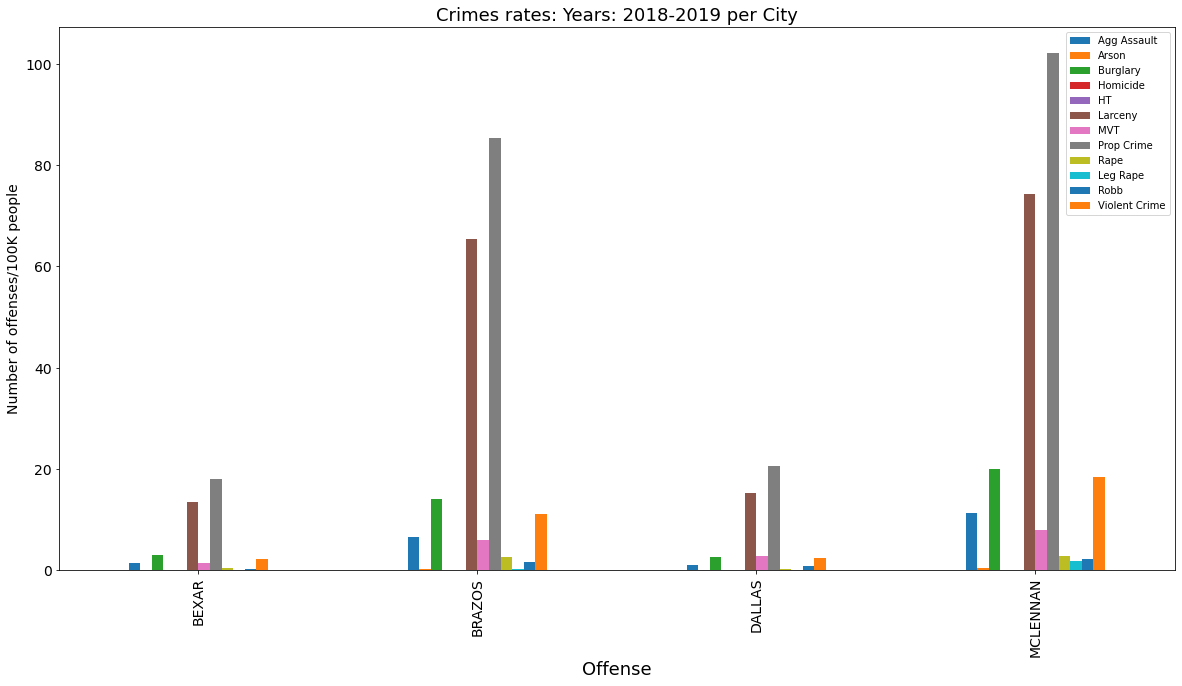

In [27]:
plot1=by_countyoffense_pc_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=14)
plot1.legend(['Agg Assault','Arson','Burglary','Homicide','HT','Larceny','MVT','Prop Crime','Rape','Leg Rape','Robb','Violent Crime'])
plt.xlabel("Offense",fontsize=18)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates: Years: 2018-2019 per City',fontsize=18)

In [28]:
test=merge_df.groupby(["offense","county"]).sum()["actual"]

test=pd.DataFrame(test)/Total_pop
test

actual
offense             county              
aggravated-assault  BEXAR      28.987217
                    BRAZOS     15.083579
                    DALLAS     29.655851
                    MCLENNAN   29.026549
arson               BEXAR       2.261554
                    BRAZOS      0.432645
                    DALLAS      1.022616
                    MCLENNAN    0.983284
burglary            BEXAR      59.056047
                    BRAZOS     32.192724
                    DALLAS     69.262537
                    MCLENNAN   51.111111
homicide            BEXAR       0.589971
                    BRAZOS      0.137660
                    DALLAS      0.668633
                    MCLENNAN    0.294985
human-trafficing    BEXAR       0.000000
                    BRAZOS      0.000000
                    DALLAS      0.000000
                    MCLENNAN    0.000000
larceny             BEXAR     271.504425
                    BRAZOS    149.675516
                    DALLAS    394.198623
                    MCLENNAN  190.009833
motor-vehicle-theft BEXAR      30.580138
                    BRAZOS     13.726647
                    DALLAS     73.883972
                    MCLENNAN   20.452311
property-crime      BEXAR     361.140610
                    BRAZOS    195.594887
                    DALLAS    537.345133
                    MCLENNAN  261.573255
rape                BEXAR       7.708948
                    BRAZOS      6.017699
                    DALLAS      6.489676
                    MCLENNAN    7.099312
rape-legacy         BEXAR       0.491642
                    BRAZOS      0.530973
                    DALLAS      1.514258
                    MCLENNAN    4.798427
robbery             BEXAR       6.253687
                    BRAZOS      3.677483
                    DALLAS     22.910521
                    MCLENNAN    5.939036
violent-crime       BEXAR      44.031465
                    BRAZOS     25.447394
                    DALLAS     61.238938
                    MCLENNAN   47.158309

In [31]:
def f(row):
    if row.name[1]=="BEXAR":
        return row['actual']/bexar_pop
    elif row.name[1]=="BRAZOS":
        return row['actual']/brazos_pop
    elif row.name[1]=="DALLAS":
        return row['actual']/dallas_pop
    elif row.name[1]=="MCLENNAN":
        return row['actual']/mc_pop
b=test.apply(f,axis=1)
by_crime_pc_df=pd.DataFrame(b)
by_crime_pc_df

0
offense             county              
aggravated-assault  BEXAR       1.449361
                    BRAZOS      6.586716
                    DALLAS      1.140610
                    MCLENNAN   11.338496
arson               BEXAR       0.113078
                    BRAZOS      0.188928
                    DALLAS      0.039331
                    MCLENNAN    0.384095
burglary            BEXAR       2.952802
                    BRAZOS     14.057958
                    DALLAS      2.663944
                    MCLENNAN   19.965278
homicide            BEXAR       0.029499
                    BRAZOS      0.060113
                    DALLAS      0.025717
                    MCLENNAN    0.115229
human-trafficing    BEXAR       0.000000
                    BRAZOS      0.000000
                    DALLAS      0.000000
                    MCLENNAN    0.000000
larceny             BEXAR      13.575221
                    BRAZOS     65.360487
                    DALLAS     15.161486
                    MCLENNAN   74.222591
motor-vehicle-theft BEXAR       1.529007
                    BRAZOS      5.994169
                    DALLAS      2.841691
                    MCLENNAN    7.989184
property-crime      BEXAR      18.057030
                    BRAZOS     85.412614
                    DALLAS     20.667120
                    MCLENNAN  102.177053
rape                BEXAR       0.385447
                    BRAZOS      2.627816
                    DALLAS      0.249603
                    MCLENNAN    2.773169
rape-legacy         BEXAR       0.024582
                    BRAZOS      0.231866
                    DALLAS      0.058241
                    MCLENNAN    1.874385
robbery             BEXAR       0.312684
                    BRAZOS      1.605888
                    DALLAS      0.881174
                    MCLENNAN    2.319936
violent-crime       BEXAR       2.201573
                    BRAZOS     11.112399
                    DALLAS      2.355344
                    MCLENNAN   18.421214

Text(0.5, 1.0, 'Crimes rates: Years: 2018-2019')

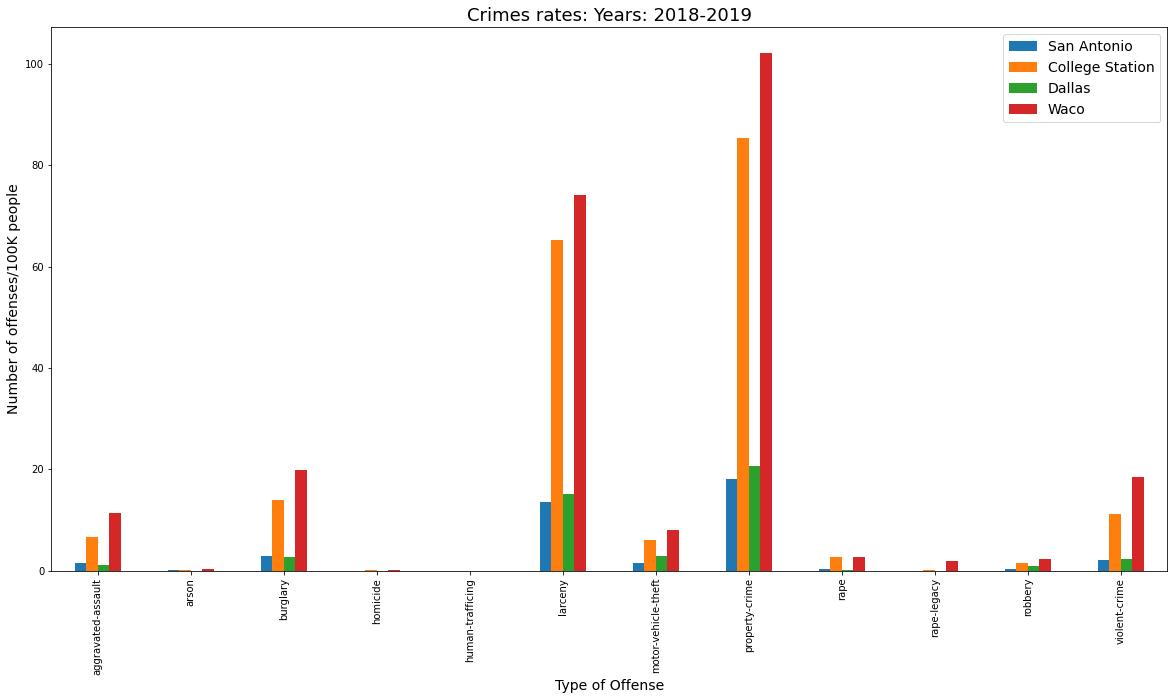

In [32]:
plot2=by_crime_pc_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=10 )
plot2.legend(['San Antonio','College Station','Dallas','Waco'], fontsize=14)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates: Years: 2018-2019',fontsize=18)


In [ ]:

county_2018_df=merge_df[(merge_df.data_year==2018)]
county_2018_df=county_2018_df.groupby("county").sum()
county_2018_df=county_2018_df['actual']
county_2018_df=pd.DataFrame(county_2018_df)
county_2018_df=county_2018_df.rename(columns={"actual":2018})
county_2018_df

In [ ]:
county_2019_df=merge_df[(merge_df.data_year==2019)]
county_2019_df=county_2019_df.groupby("county").sum()
county_2019_df=county_2019_df['actual']
county_2019_df=pd.DataFrame(county_2019_df)
county_2019_df=county_2019_df.rename(columns={"actual":2019})
county_2019_df

In [ ]:
county_total_peryear_df=pd.concat([county_2018_df,county_2019_df], axis=1)
county_total_peryear_df


In [ ]:
county_total_peryear_pc_df=(county_total_peryear_df/(Total_pop)).round(0)
county_total_peryear_pc_df

In [ ]:
year_county=merge_df.groupby(["data_year",'county']).sum()["actual"]
year_county_df=pd.DataFrame(year_county)
year_county_pc_df=(year_county_df/Total_pop).round(0)

In [ ]:
plot3=year_county_pc_df.unstack().plot(kind='bar', figsize=(20,10), fontsize =14)
plt.legend(['San Antonio','College Station','Dallas','Waco'], fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates: Years: 2018-2019',fontsize=18)
plt.savefig("../figures/total_by_year_per_capita")

In [ ]:
west_df=merge_df[(merge_df.county=="BRAZOS")|(merge_df.county=="BEXAR")]
west_df

In [ ]:
######creating df for type of offense--- these two blocks extract the counts for each offense in rows to convert them into columns

In [ ]:
type=["aggravated-assault","arson","burglary","homicide","human-trafficing","larceny","motor-vehicle-theft","property-crime","rape","rape-legacy","robbery","violent-crime"]

In [ ]:
agg_assault=(merge_df[(merge_df.offense=='aggravated-assault')]['actual'].reset_index(drop=True))

arson=(merge_df[(merge_df.offense=='arson')]['actual'].reset_index(drop=True))

burglary=(merge_df[(merge_df.offense=='burglary')]['actual'].reset_index(drop=True))

homicide=(merge_df[(merge_df.offense=='homicide')]['actual'].reset_index(drop=True))

hum_traffic=(merge_df[(merge_df.offense=='human-trafficing')]['actual'].reset_index(drop=True))

larceny=(merge_df[(merge_df.offense=='larceny')]['actual'].reset_index(drop=True))

mvt=(merge_df[(merge_df.offense=='motor-vehicle-theft')]['actual'].reset_index(drop=True))

property_crime=(merge_df[(merge_df.offense=='property-crime')]['actual'].reset_index(drop=True))

rape=(merge_df[(merge_df.offense=='rape')]['actual'].reset_index(drop=True))

rape_leg=(merge_df[(merge_df.offense=='rape_legacy')]['actual'].reset_index(drop=True))

robbery=(merge_df[(merge_df.offense=='robbery')]['actual'].reset_index(drop=True))

viol_crime=(merge_df[(merge_df.offense=='violent_crime')]['actual'].reset_index(drop=True))

In [ ]:
agg_assault=pd.DataFrame(agg_assault).rename(columns={'actual':'agg_assault'})

arson=pd.DataFrame(arson).rename(columns={'actual':'arson'})

burglary=pd.DataFrame(burglary).rename(columns={'actual':'burglary'})

homicide=pd.DataFrame(homicide).rename(columns={'actual':'homicide'})

hum_traffic=pd.DataFrame(hum_traffic).rename(columns={'actual':'hum_traffic'})

larceny=pd.DataFrame(larceny).rename(columns={'actual':'larceny'})

mvt=pd.DataFrame(mvt).rename(columns={'actual':'mvt'})

prop_crime=pd.DataFrame(property_crime).rename(columns={'actual':'property_crime'})

rape=pd.DataFrame(rape).rename(columns={'actual':'rape'})

robbery=pd.DataFrame(robbery).rename(columns={'actual':'robber'})

viol_crime=pd.DataFrame(viol_crime).rename(columns={'actual':'viol_crime'})







In [ ]:
crimes_df=pd.concat([agg_assault,arson,burglary, homicide,larceny,mvt,prop_crime,rape,robbery], axis=1)
crimes_df=crimes_df.replace(np.nan,0)
crimes_df

In [ ]:
corr = crimes_df.corr()
fig = plt.figure()
test = fig.add_subplot()
colors_test = test.matshow(corr,cmap='Spectral', vmin=-1, vmax=1)
fig.colorbar(colors_test)
ticks = np.arange(0,len(crimes_df.columns),1)
test.set_xticks(ticks)
plt.xticks(rotation=90)
test.set_yticks(ticks)
test.set_xticklabels(crimes_df.columns)
test.set_yticklabels(crimes_df.columns)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Type of Offense",fontsize=14)
plt.title('Correlation matrix among type of Crimes in 4 Cities in TX',fontsize=18)
plt.show()
plt.savefig("../figures/correlation_between_types_of_crime")    

In [ ]:
#Group_Labels = ["aggravated-assault","arson","burglary","homicide","human-trafficing","larceny","motor-vehicle-theft","property-crime","rape","rape-legacy","robbery","violent-crime"]



In [ ]:
west_df=merge_df[(merge_df.county=="BRAZOS")|(merge_df.county=="BEXAR")]
west_df=west_df.groupby(["offense","county"]).sum()["actual"]
west_df=pd.DataFrame(west_df)/Total_pop #### this is not correct. Bexar and Brazos should be divided by their corresponding population.
west_df

In [ ]:
plot3=west_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=10 )
plot3.legend(['San Antonio','College Station'], fontsize=14)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates comparison between San Antonio & College Station: 2018-2019',fontsize=18)
plt.savefig("../figures/offense_SA_CS_per_capita")

In [ ]:
north_df=merge_df[(merge_df.county=="DALLAS")|(merge_df.county=="MCLENNAN")]
north_df=north_df.groupby(["offense","county"]).sum()["actual"]
north_df=pd.DataFrame(north_df)/Total_pop
north_df

In [ ]:
plot4=north_df.unstack().plot(kind='bar', figsize=(20,10), fontsize=10 )
plot4.legend(['Dallas','Waco'], fontsize=14)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates comparison between Dallas & Waco: 2018-2019',fontsize=18)
plt.savefig("../figures/offense_D_W_per_capita")

In [ ]:
agg_assault=(west_df[(west_df.offense=='aggravated-assault')]['actual'].reset_index(drop=True))
arson=(west_df[(west_df.offense=='arson')]['actual'].reset_index(drop=True))
burglary=(west_df[(west_df.offense=='burglary')]['actual'].reset_index(drop=True))
homicide=(west_df[(west_df.offense=='homicide')]['actual'].reset_index(drop=True))
hum_traffic=(west_df[(west_df.offense=='human-trafficing')]['actual'].reset_index(drop=True))
larceny=(west_df[(west_df.offense=='larceny')]['actual'].reset_index(drop=True))
mvt=(west_df[(west_df.offense=='motor-vehicle-theft')]['actual'].reset_index(drop=True))
property_crime=(west_df[(west_df.offense=='property-crime')]['actual'].reset_index(drop=True))
rape=(west_df[(west_df.offense=='rape')]['actual'].reset_index(drop=True))
rape_leg=(west_df[(west_df.offense=='rape_legacy')]['actual'].reset_index(drop=True))
robbery=(west_df[(west_df.offense=='robbery')]['actual'].reset_index(drop=True))
viol_crime=(west_df[(west_df.offense=='violent_crime')]['actual'].reset_index(drop=True))

In [ ]:
agg_assault=pd.DataFrame(agg_assault).rename(columns={'actual':'agg_assault'})
arson=pd.DataFrame(arson).rename(columns={'actual':'arson'})
burglary=pd.DataFrame(burglary).rename(columns={'actual':'burglary'})
homicide=pd.DataFrame(homicide).rename(columns={'actual':'homicide'})
hum_traffic=pd.DataFrame(hum_traffic).rename(columns={'actual':'hum_traffic'})
larceny=pd.DataFrame(larceny).rename(columns={'actual':'larceny'})
mvt=pd.DataFrame(mvt).rename(columns={'actual':'mvt'})
prop_crime=pd.DataFrame(property_crime).rename(columns={'actual':'property_crime'})
rape=pd.DataFrame(rape).rename(columns={'actual':'rape'})
robbery=pd.DataFrame(robbery).rename(columns={'actual':'robber'})
viol_crime=pd.DataFrame(viol_crime).rename(columns={'actual':'viol_crime'})

In [ ]:
crimes_w_df=pd.concat([agg_assault,arson,burglary, homicide,larceny,mvt,prop_crime,rape,robbery], axis=1)
crimes_w_df=crimes_w_df.replace(np.nan,0)/Total_pop
crimes_w_df

In [ ]:
corr = crimes_w_df.corr()
fig = plt.figure()
test = fig.add_subplot()
colors_test = test.matshow(corr,cmap='Spectral', vmin=-1, vmax=1)
fig.colorbar(colors_test)
ticks = np.arange(0,len(crimes_w_df.columns),1)
test.set_xticks(ticks)
plt.xticks(rotation=90)
test.set_yticks(ticks)
test.set_xticklabels(crimes_w_df.columns)
test.set_yticklabels(crimes_w_df.columns)
plt.xlabel("Type of Offense",fontsize=14)
plt.ylabel("Type of Offense",fontsize=14)
plt.title('Correlation matrix among type of Crimes in San Antonio and College Station',fontsize=18)
plt.show()
plt.savefig("../figures/correlation_SA_CS")

In [ ]:
sa_df=merge_df[(merge_df.county=="BEXAR")]
sa_df=sa_df.groupby(["offense","county"]).sum()['actual']
sa_df=pd.DataFrame(sa_df)
sa_df